# Lung Cancer Prediction

#### Import relevant libraries / dependancies

In [107]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import missingno as msno
import autoreload
import os
import csv
import sys
import warnings

from collections import defaultdict, Counter

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 10000)

sb.set_style('darkgrid')
sb.set()

warnings.simplefilter('ignore')


#### Load Dataset from local Host Machine

In [108]:
df = pd.read_csv("D:\Open Classroom\Datasets\Lung Cancer\survey lung cancer.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


#### Statistical Analysis

In [109]:
df.shape

(309, 16)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [111]:
round(df.describe(), 2)

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.00,309.00,309.00,309.0,309.0,309.0,309.00,309.00,309.00,309.00,309.00,309.00,309.00,309.00
mean,62.67,1.56,1.57,1.5,1.5,1.5,1.67,1.56,1.56,1.56,1.58,1.64,1.47,1.56
std,8.21,0.50,0.50,0.5,0.5,0.5,0.47,0.50,0.50,0.50,0.49,0.48,0.50,0.50
min,21.00,1.00,1.00,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,57.00,1.00,1.00,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
50%,62.00,2.00,2.00,1.0,2.0,2.0,2.00,2.00,2.00,2.00,2.00,2.00,1.00,2.00
75%,69.00,2.00,2.00,2.0,2.0,2.0,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00
max,87.00,2.00,2.00,2.0,2.0,2.0,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00


In [112]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

Text(0.5, 1.0, 'Kendall Correlation of Columns')

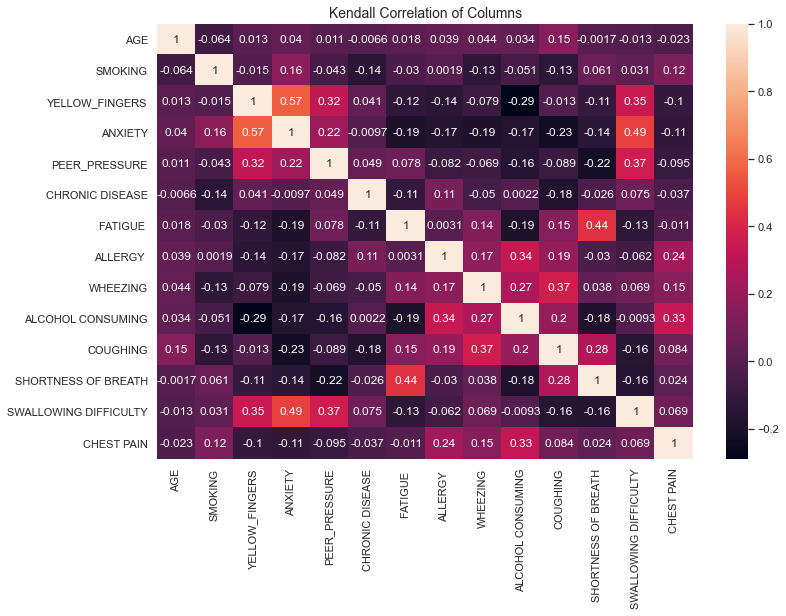

In [113]:
plt.figure(figsize = (12,8))
sb.heatmap(df.corr(method='kendall'), annot = True)
plt.title('Kendall Correlation of Columns', fontdict={'fontsize':14})

In [119]:
df.sample(2)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
156,1,47,2,2,1,1,2,1,1,1,1,1,1,1,2,0
197,1,59,1,2,2,1,1,2,1,2,1,1,1,2,2,1


#### Feature Engineering

In [114]:
df.head(3)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO


#### Using Label Encoder to transform textual data to numeric 

In [115]:
le = LabelEncoder()

df['GENDER'] = le.fit_transform(df['GENDER'])
df['LUNG_CANCER'] = le.fit_transform(df['LUNG_CANCER'])
# le.fit_transform(df.select_dtypes(include = 'object'))
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


#### Evaluate the Performance of Machine learning Algorithm

In [116]:
x = df.drop(columns = ['LUNG_CANCER'])
y = df['LUNG_CANCER']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

print('x train', x_train.shape)
print('x test', x_test.shape)
print('y train', y_train.shape)
print('y test', y_test.shape)

x train (247, 15)
x test (62, 15)
y train (247,)
y test (62,)


#### Draw conclusion from a predictive model for the Supervised Learning approach

In [117]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train, y_train)

pred = dtc.predict(x_train)
score = dtc.score(x_train, y_train)
print(pred)
print()
print('Accruracy Score:', score)

[1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1]

Accruracy Score: 0.9959514170040485


In [118]:
val_score = cross_val_score(dtc, x_test, y_test, cv=10)
val_score

array([1.        , 0.85714286, 1.        , 1.        , 0.83333333,
       1.        , 1.        , 0.83333333, 0.83333333, 1.        ])